In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/IRIS.csv')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['species'].nunique()

3

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


(array([0, 1, 2]),
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

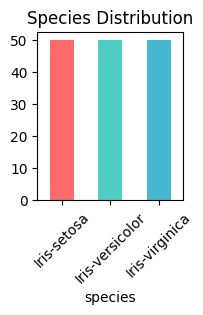

In [ ]:
plt.subplot(2, 3, 1)
df['species'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Species Distribution')
plt.xticks(rotation=45)

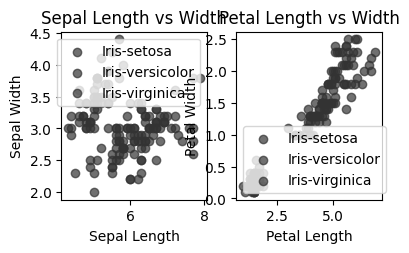

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': '#45B7D1'}

plt.subplot(2, 3, 2)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'],
               label=species, alpha=0.7, color=colors.get(species, '#333'))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Width')
plt.legend()

plt.subplot(2, 3, 3)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['petal_length'], species_data['petal_width'],
               label=species, alpha=0.7, color=colors.get(species, '#333'))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.legend()


Text(0.5, 0.98, '')

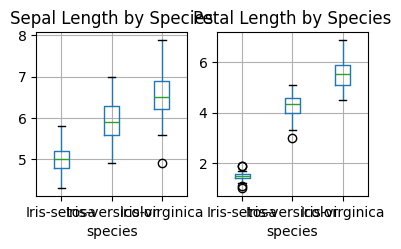

In [ ]:
plt.subplot(2, 3, 4)
df.boxplot(column='sepal_length', by='species', ax=plt.gca())
plt.title('Sepal Length by Species')
plt.suptitle('')

plt.subplot(2, 3, 5)
df.boxplot(column='petal_length', by='species', ax=plt.gca())
plt.title('Petal Length by Species')
plt.suptitle('')

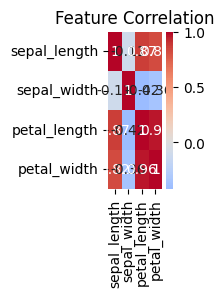

In [ ]:
plt.subplot(2,4,7)
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation')

plt.tight_layout()
plt.show()

In [ ]:
X = df[features]
y = df['species']

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
X.shape,y_encoded.shape,dict(zip(le.classes_, range(len(le.classes_))))

((150, 4),
 (150,),
 {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [ ]:
results = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}")

    if name in ['Logistic Regression', 'SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


🔄 Training Random Forest

🔄 Training Logistic Regression

🔄 Training SVM

🔄 Training KNN

🔄 Training Decision Tree


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results[name] = accuracy
print(f"✅ {name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

✅ Decision Tree Accuracy: 0.9333 (93.33%)


In [ ]:
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"\nBEST MODEL: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


BEST MODEL: Decision Tree
Best Accuracy: 0.9333 (93.33%)


In [ ]:
best_model = models[best_model_name]
if best_model_name in ['Logistic Regression', 'SVM', 'KNN']:
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

print(f"\n DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


 DETAILED CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



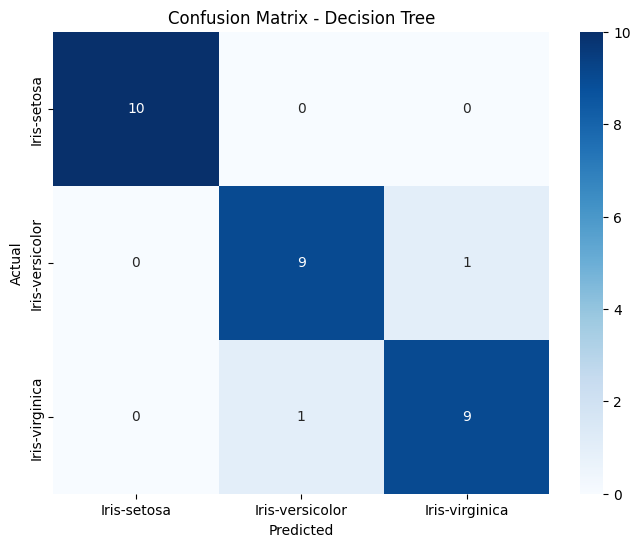

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

(0.8, 1.0)

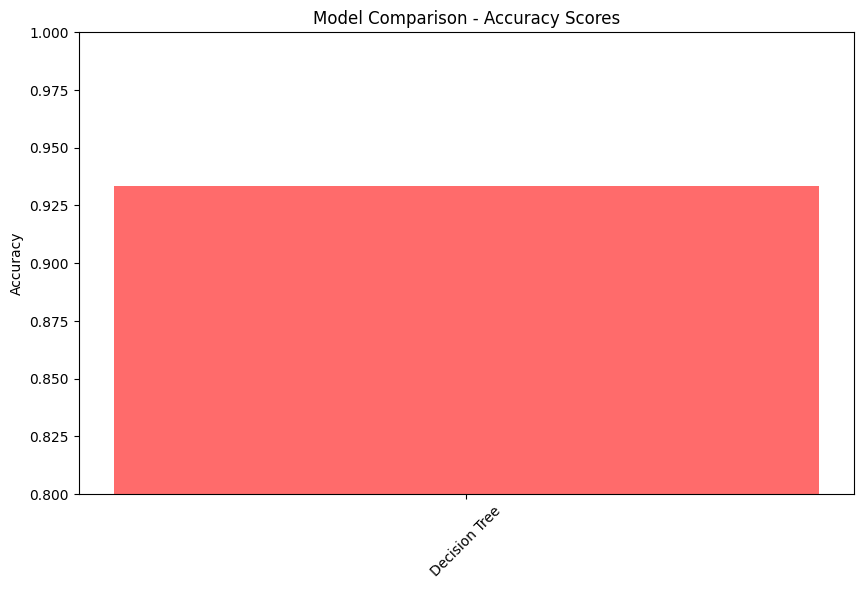

In [ ]:
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(model_names, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Model Comparison - Accuracy Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

In [ ]:
def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predict the species of an iris flower based on its measurements
    """
    # Create input array
    input_features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale if needed
    if best_model_name in ['Logistic Regression', 'SVM', 'KNN']:
        input_features = scaler.transform(input_features)

    # Make prediction
    prediction = best_model.predict(input_features)[0]
    probability = None

    # Get probability if available
    if hasattr(best_model, 'predict_proba'):
        if best_model_name in ['Logistic Regression', 'SVM', 'KNN']:
            probabilities = best_model.predict_proba(input_features)[0]
        else:
            probabilities = best_model.predict_proba(input_features)[0]
        probability = max(probabilities)

    species_name = le.inverse_transform([prediction])[0]

    return species_name, probability

# Step 10: Test with Sample Predictions
print("\n" + "="*50)
print("SAMPLE PREDICTIONS")
print("="*50)

# Sample test cases
test_cases = [
    (5.1, 3.5, 1.4, 0.2, "setosa"),
    (6.4, 3.2, 4.5, 1.5, "versicolor"),
    (6.3, 3.3, 6.0, 2.5, "virginica")
]

for i, (sl, sw, pl, pw, expected) in enumerate(test_cases, 1):
    predicted, confidence = predict_iris_species(sl, sw, pl, pw)

    print(f"\n Test Case {i}:")
    print(f"   Measurements: SL={sl}, SW={sw}, PL={pl}, PW={pw}")
    print(f"   Expected: {expected}")
    print(f"   Predicted: {predicted}")
    if confidence:
        print(f"   Confidence: {confidence:.3f}")
    print(f"{'Correct!' if predicted.lower() == expected.lower() else ' Incorrect'}")



SAMPLE PREDICTIONS

 Test Case 1:
   Measurements: SL=5.1, SW=3.5, PL=1.4, PW=0.2
   Expected: setosa
   Predicted: Iris-setosa
   Confidence: 1.000
 Incorrect

 Test Case 2:
   Measurements: SL=6.4, SW=3.2, PL=4.5, PW=1.5
   Expected: versicolor
   Predicted: Iris-versicolor
   Confidence: 1.000
 Incorrect

 Test Case 3:
   Measurements: SL=6.3, SW=3.3, PL=6.0, PW=2.5
   Expected: virginica
   Predicted: Iris-virginica
   Confidence: 1.000
 Incorrect


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local

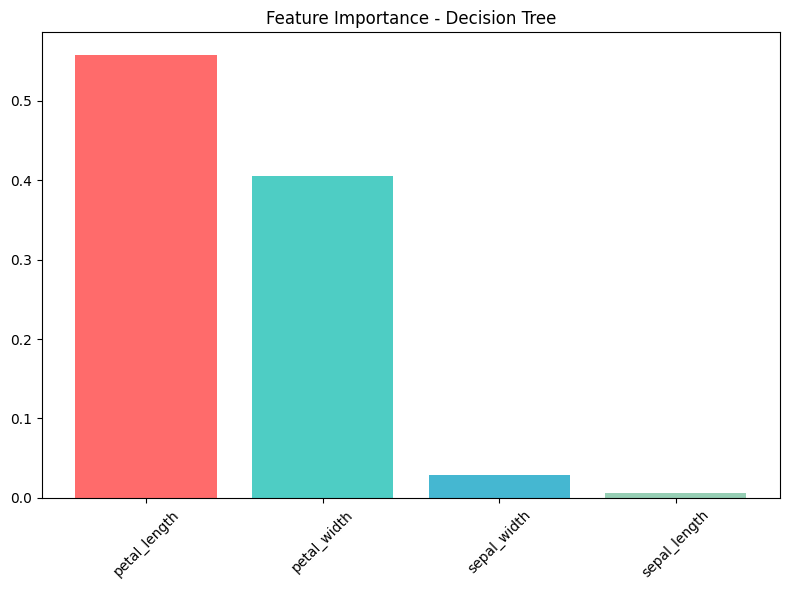

In [ ]:
if best_model_name in ['Random Forest', 'Decision Tree']:
    plt.figure(figsize=(8, 6))
    importance = best_model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importance
    }).sort_values('importance', ascending=False)

    plt.bar(feature_importance['feature'], feature_importance['importance'],
            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()